# 1. Crear un entorno de anaconda con los paquetes que considere necesarios.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Cargar datos desde archivo .npy
data = np.load("proyecto_training_data.npy")

# 2. Definir nombres de columnas
column_names = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

# 3. Convertir a DataFrame
df = pd.DataFrame(data, columns=column_names)

print(df.head())
print(df.shape)

   SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0   208500.0          7.0     856.0           8.0     2003.0         65.0
1   181500.0          6.0    1262.0           6.0     1976.0         80.0
2   223500.0          7.0     920.0           6.0     2001.0         68.0
3   140000.0          7.0     961.0           7.0     1915.0         60.0
4   250000.0          8.0    1145.0           9.0     2000.0         84.0
(1460, 6)


# 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validaci¬¥on y pruebas(20 %).

In [41]:
# Convertimos el DataFrame a array NumPy de nuevo (por requerimiento de usar slicing con NumPy)
data_array = df.values

# Calcular el √≠ndice del 80%
split_index = int(0.8 * len(data_array))

# Slicing: 80% para entrenamiento
train_data = data_array[:split_index]

# Slicing: 20% para validaci√≥n/prueba
val_data = data_array[split_index:]

# Verificaci√≥n de tama√±os
print("Tama√±o total:", data_array.shape)
print("Entrenamiento:", train_data.shape)
print("Validaci√≥n/Prueba:", val_data.shape)

Tama√±o total: (1460, 6)
Entrenamiento: (1168, 6)
Validaci√≥n/Prueba: (292, 6)


# 3. An¬¥alisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):

In [42]:
# Convertimos el set de entrenamiento a DataFrame otra vez para facilitar an√°lisis
df_train = pd.DataFrame(train_data, columns=column_names)

# Calculamos las estad√≠sticas para cada columna
media = df_train.mean()
maximo = df_train.max()
minimo = df_train.min()
rango = df_train.max() - df_train.min()
desviacion_std = df_train.std()

# Mostramos los resultados
resumen = pd.DataFrame({
    "Media": media,
    "M√°ximo": maximo,
    "M√≠nimo": minimo,
    "Rango": rango,
    "Desviaci√≥n est√°ndar": desviacion_std
})

print(resumen)

                      Media    M√°ximo   M√≠nimo     Rango  Desviaci√≥n est√°ndar
SalePrice     180590.277397  755000.0  34900.0  720100.0         78815.697902
OverallQual        6.101027      10.0      1.0       9.0             1.378025
1stFlrSF        1156.323630    3228.0    334.0    2894.0           373.780374
TotRmsAbvGrd       6.485445      14.0      2.0      12.0             1.609141
YearBuilt       1971.451199    2010.0   1875.0     135.0            29.951707
LotFrontage       69.946985     313.0     21.0     292.0            23.478161


# 4. Para cada variable en el dataset usar seaborn(funci¬¥on distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


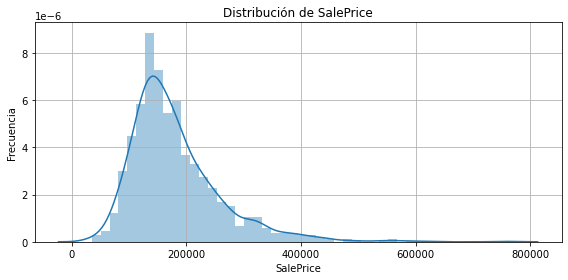

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


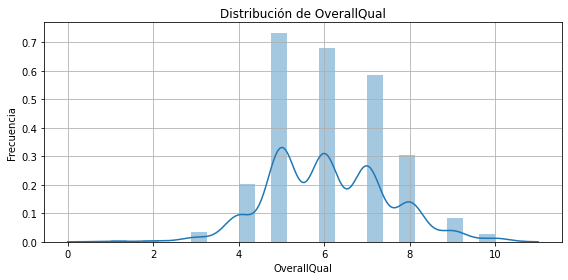

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


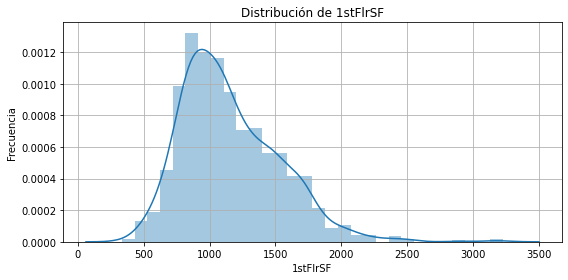

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


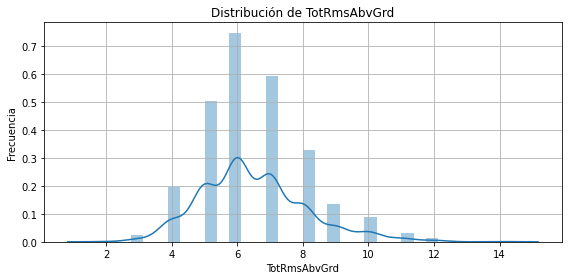

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


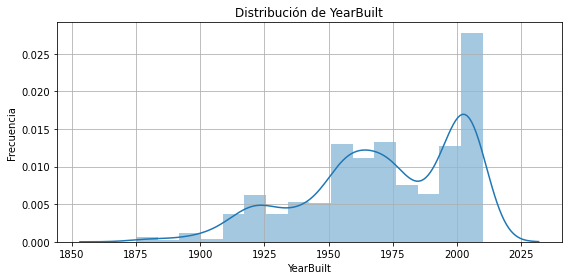

C:\Users\lalvarez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


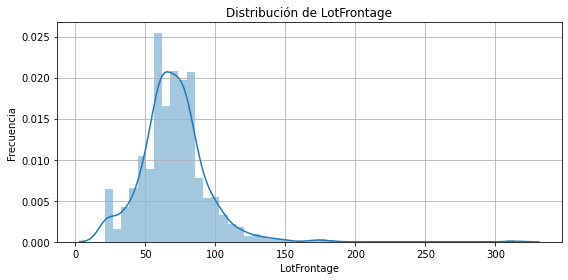

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarnos de que los datos est√©n en un DataFrame
df_train = pd.DataFrame(train_data, columns=column_names)

# Crear histogramas con distplot
for column in df_train.columns:
    plt.figure(figsize=(8, 4))
    sns.distplot(df_train[column], kde=True, hist=True)
    plt.title(f"Distribuci√≥n de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Variable dependiente y variables independientes

In [44]:
# variable dependiente
y_var = "SalePrice"

# variales independientes 
x_vars = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

y_var = "SalePrice"
x_vars = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

print("Variable dependiente (y):", y_var)
print("Variables independientes (x):", x_vars)

Variable dependiente (y): SalePrice
Variables independientes (x): ['OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']


# 5. Para cada variable independiente x :

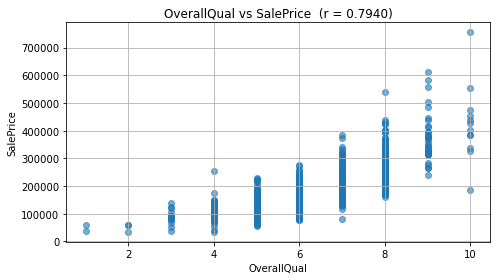

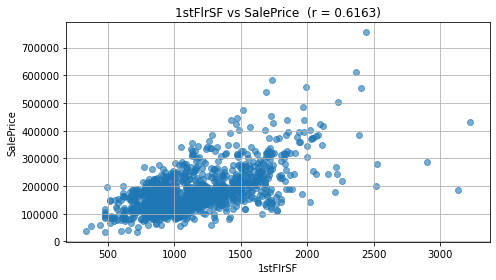

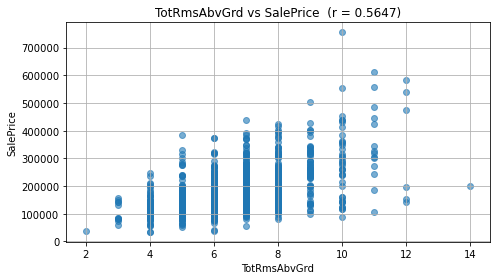

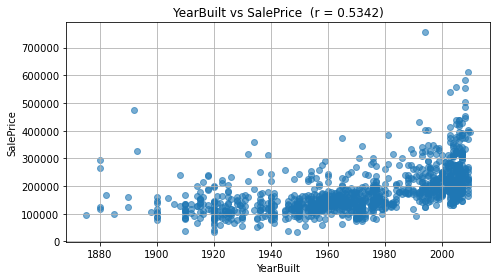

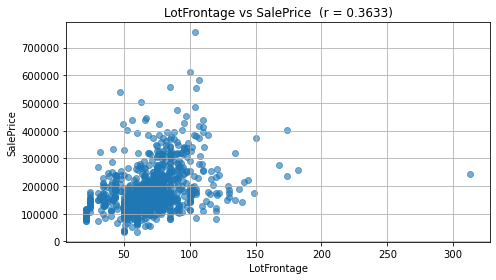


Top 2 variables con mayor correlaci√≥n con SalePrice:
OverallQual: r = 0.7940
1stFlrSF: r = 0.6163


In [45]:
import matplotlib.pyplot as plt
import numpy as np


df_train = pd.DataFrame(train_data, columns=column_names)

y_var = "SalePrice"
x_vars = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

correlaciones = {}

for x in x_vars:
    # Calcular coeficiente de correlaci√≥n de Pearson
    r = df_train[x].corr(df_train[y_var])
    correlaciones[x] = r

    # Graficar x vs y
    plt.figure(figsize=(7, 4))
    plt.scatter(df_train[x], df_train[y_var], alpha=0.6)
    plt.xlabel(x)
    plt.ylabel(y_var)
    plt.title(f"{x} vs {y_var}  (r = {r:.4f})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ordenar correlaciones de mayor a menor
sorted_corr = sorted(correlaciones.items(), key=lambda item: abs(item[1]), reverse=True)

# Mostrar las 2 variables con mayor correlaci√≥n
print("\nTop 2 variables con mayor correlaci√≥n con SalePrice:")
for var, r in sorted_corr[:2]:
    print(f"{var}: r = {r:.4f}")

# 6. Crear una funci¬¥on para entrenar un modelo de regresi¬¥on lineal de una variable y = Œ≤0 +Œ≤1 ‚àóx. La funci¬¥on recibe como argumentos:

In [46]:
def entrenar_modelo_lineal(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)
    
    # Inicializar par√°metros del modelo
    beta_0 = 0
    beta_1 = 0
    
    for epoch in range(1, epochs + 1):
        # Predicciones
        y_pred = beta_0 + beta_1 * x

        # Errores
        error = y_pred - y

        # Gradientes
        grad_b0 = np.mean(error)
        grad_b1 = np.mean(error * x)

        # Actualizaci√≥n de par√°metros
        beta_0 -= alpha * grad_b0
        beta_1 -= alpha * grad_b1

        # Calcular error cuadr√°tico medio (MSE)
        mse = np.mean(error ** 2)

        # Mostrar cada cierto n√∫mero de iteraciones
        if epoch % imprimir_error_cada == 0:
            print(f"Iteraci√≥n {epoch}: MSE = {mse:.4f}")
    
    # Devolver los coeficientes entrenados
    return beta_0, beta_1

In [47]:
# Tomamos una de las mejores variables independientes, por ejemplo: OverallQual
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

# Entrenar el modelo
b0, b1 = entrenar_modelo_lineal(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

print(f"\nModelo final: y = {b0:.2f} + {b1:.2f} * x")

Iteraci√≥n 10: MSE = 2788908791.0477
Iteraci√≥n 20: MSE = 2780695183.5100
Iteraci√≥n 30: MSE = 2776105402.5689
Iteraci√≥n 40: MSE = 2771559016.0494
Iteraci√≥n 50: MSE = 2767055488.3134
Iteraci√≥n 60: MSE = 2762594415.3268
Iteraci√≥n 70: MSE = 2758175396.8685
Iteraci√≥n 80: MSE = 2753798036.4908
Iteraci√≥n 90: MSE = 2749461941.4828
Iteraci√≥n 100: MSE = 2745166722.8361

Modelo final: y = -50.11 + 30356.46 * x


# 7. Para crear su funci¬¥on debe considerar lo siguiente:

# a. Crear una matriz de 2 columnas, la primera columna corresponde al vector de datos x y la segunda columna de la matriz para todas las filas es igual a 1.

In [48]:
def entrenar_modelo_lineal(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)
    
    # Crear la matriz X: columna 1 = x, columna 2 = 1's
    X = np.column_stack((x, np.ones(n)))  # X.shape = (n, 2)

    # Inicializar par√°metros (beta_1 y beta_0)
    beta = np.zeros(2)  # [beta_1, beta_0]

    for epoch in range(1, epochs + 1):
        # Predicciones
        y_pred = X @ beta  # producto punto matriz

        # Error
        error = y_pred - y

        # Gradiente (derivada del MSE)
        grad = (2 / n) * (X.T @ error)  # vector de tama√±o (2,)

        # Actualizar par√°metros
        beta -= alpha * grad

        # MSE
        mse = np.mean(error ** 2)

        # Imprimir error
        if epoch % imprimir_error_cada == 0:
            print(f"Iteraci√≥n {epoch}: MSE = {mse:.4f}")
    
    # Retornar los coeficientes como beta_0 (intercepto) y beta_1 (pendiente)
    return beta[1], beta[0]  # ordenados como: (intercepto, pendiente)

x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

b0, b1 = entrenar_modelo_lineal(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

print(f"\nModelo entrenado: y = {b0:.2f} + {b1:.2f} * x")

Iteraci√≥n 10: MSE = 2781154448.2382
Iteraci√≥n 20: MSE = 2772007642.0307
Iteraci√≥n 30: MSE = 2763032517.1059
Iteraci√≥n 40: MSE = 2754225851.0783
Iteraci√≥n 50: MSE = 2745584482.0533
Iteraci√≥n 60: MSE = 2737105307.4835
Iteraci√≥n 70: MSE = 2728785283.0546
Iteraci√≥n 80: MSE = 2720621421.5932
Iteraci√≥n 90: MSE = 2712610791.9932
Iteraci√≥n 100: MSE = 2704750518.1643

Modelo entrenado: y = -4512.02 + 31053.17 * x


# b. Inicializar los par¬¥ametros del modelo en un vector Œ≤0 y Œ≤1, esto es equivalente a empezar el proceso con una recta inicial la cual en cada iteraci¬¥on actualizaremos hasta encontrar una que aproxime de buena manera los datos x, y.

Iteraci√≥n 20: MSE = 2772007642.0307
Iteraci√≥n 40: MSE = 2754225851.0783
Iteraci√≥n 60: MSE = 2737105307.4835
Iteraci√≥n 80: MSE = 2720621421.5932
Iteraci√≥n 100: MSE = 2704750518.1643


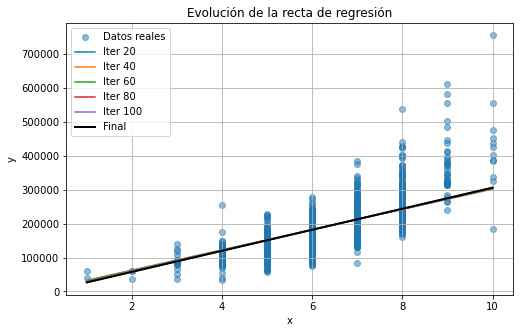


Modelo final: y = -4512.02 + 31053.17 * x


In [49]:
import matplotlib.pyplot as plt
import numpy as np

def entrenar_y_visualizar(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)
    X = np.column_stack((x, np.ones(n)))
    beta = np.array([0.0, 0.0])  # [beta_1, beta_0]

    historial = []  # Guardar los betas en momentos clave

    for epoch in range(1, epochs + 1):
        y_pred = X @ beta
        error = y_pred - y
        grad = (2 / n) * (X.T @ error)
        beta -= alpha * grad
        mse = np.mean(error ** 2)

        if epoch % imprimir_error_cada == 0:
            historial.append(beta.copy())
            print(f"Iteraci√≥n {epoch}: MSE = {mse:.4f}")
    
    # Graficar evoluci√≥n de las rectas
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, alpha=0.5, label='Datos reales')

    x_line = np.linspace(min(x), max(x), 100)

    for i, b in enumerate(historial):
        y_line = b[0] * x_line + b[1]
        plt.plot(x_line, y_line, label=f'Iter {imprimir_error_cada * (i + 1)}')

    # √öltima recta destacada
    final_line = beta[0] * x_line + beta[1]
    plt.plot(x_line, final_line, color='black', linewidth=2, label='Final')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Evoluci√≥n de la recta de regresi√≥n")
    plt.legend()
    plt.grid(True)
    plt.show()

    return beta[1], beta[0]  # (intercepto, pendiente)

x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

b0, b1 = entrenar_y_visualizar(x, y, epochs=100, imprimir_error_cada=20, alpha=0.01)

print(f"\nModelo final: y = {b0:.2f} + {b1:.2f} * x")

# c. por cada epoch(iteraci¬¥on) debe:

# c.1. Calcular yÀÜ(predicci¬¥on o estimaci¬¥on)

In [50]:
def entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)

    # Crear matriz de dise√±o X: (n, 2)
    # Columna 1: x, Columna 2: 1s
    X = np.column_stack((x, np.ones(n)))

    # Inicializar par√°metros: [beta_1, beta_0]
    beta = np.array([0.0, 0.0])

    for epoch in range(1, epochs + 1):
        # üü¢ 1. Predicci√≥n vectorizada: y_hat = X @ beta
        y_hat = X @ beta  # Esto es equivalente a aplicar la f√≥rmula: yÃÇ = Œ≤1 * x + Œ≤0 a todos

        # üî¥ 2. Error: diferencia entre predicci√≥n y valor real
        error = y_hat - y

        # üîµ 3. Gradiente del error cuadr√°tico medio
        grad = (2 / n) * (X.T @ error)

        # üü† 4. Actualizaci√≥n de par√°metros usando el gradiente
        beta -= alpha * grad

        # ‚ö™Ô∏è 5. Mostrar el error cada cierto n√∫mero de iteraciones
        mse = np.mean(error ** 2)
        if epoch % imprimir_error_cada == 0:
            print(f"Iteraci√≥n {epoch}: MSE = {mse:.4f}")

    return beta[1], beta[0]  # Devuelve como (intercepto, pendiente)

observacion = np.array([2, 1])         # [x, 1]
parametros = np.array([0.1, 0.2])      # [beta_1, beta_0]
y_hat = np.dot(observacion, parametros)
print("Predicci√≥n ejemplo: yÃÇ =", y_hat)  # Esperado: 0.1 * 2 + 0.2 = 0.4

Predicci√≥n ejemplo: yÃÇ = 0.4


# c.2. Calcular el error o costo usando: y ,y

In [51]:
def calcular_costo(y, y_hat):
    n = len(y)
    return (1 / (2 * n)) * np.sum((y - y_hat) ** 2)

def entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)

    # Crear matriz X con columna de x y columna de 1s
    X = np.column_stack((x, np.ones(n)))  # X.shape = (n, 2)

    # Inicializar par√°metros beta = [beta_1, beta_0]
    beta = np.array([0.0, 0.0])

    for epoch in range(1, epochs + 1):
        # Predicci√≥n vectorizada
        y_hat = X @ beta

        # C√°lculo de error (residuales)
        error = y_hat - y

        # Gradiente
        grad = (1 / n) * (X.T @ error)

        # Actualizaci√≥n de par√°metros
        beta -= alpha * grad

        # C√°lculo del costo
        costo = calcular_costo(y, y_hat)

        if epoch % imprimir_error_cada == 0:
            print(f"Iteraci√≥n {epoch}: Costo J = {costo:.4f}")

    return beta[1], beta[0]  # (intercepto, pendiente)

In [52]:
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

b0, b1 = entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)
print(f"\nModelo final: y = {b0:.2f} + {b1:.2f} * x")

Iteraci√≥n 10: Costo J = 1394454395.5238
Iteraci√≥n 20: Costo J = 1390347591.7550
Iteraci√≥n 30: Costo J = 1388052701.2844
Iteraci√≥n 40: Costo J = 1385779508.0247
Iteraci√≥n 50: Costo J = 1383527744.1567
Iteraci√≥n 60: Costo J = 1381297207.6634
Iteraci√≥n 70: Costo J = 1379087698.4343
Iteraci√≥n 80: Costo J = 1376899018.2454
Iteraci√≥n 90: Costo J = 1374730970.7414
Iteraci√≥n 100: Costo J = 1372583361.4181

Modelo final: y = -50.11 + 30356.46 * x


# c.3. Almacenar en un vector el error de cada iteraci√≥n.

In [53]:
def calcular_costo(y, y_hat):
    n = len(y)
    return (1 / (2 * n)) * np.sum((y - y_hat) ** 2)

def entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)

    # Crear matriz X: columna x y columna de 1s
    X = np.column_stack((x, np.ones(n)))

    # Inicializar par√°metros
    beta = np.array([0.0, 0.0])  # [beta_1, beta_0]

    # Inicializar lista para guardar el error en cada iteraci√≥n
    historial_error = []

    for epoch in range(1, epochs + 1):
        # Predicci√≥n vectorizada
        y_hat = X @ beta

        # Error/residual
        error = y_hat - y

        # Gradiente del costo
        grad = (1 / n) * (X.T @ error)

        # Actualizar par√°metros
        beta -= alpha * grad

        # Calcular y guardar el costo
        costo = calcular_costo(y, y_hat)
        historial_error.append(costo)

        # Imprimir si corresponde
        if epoch % imprimir_error_cada == 0:
            print(f"Iteraci√≥n {epoch}: Costo J = {costo:.4f}")

    # Devuelve: intercepto, pendiente, historial de errores
    return beta[1], beta[0], historial_error

In [54]:
import pandas as pd

column_names = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

df_train = pd.DataFrame(train_data, columns=column_names)

x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

b0, b1, errores = entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

print(f"\nModelo final: y = {b0:.2f} + {b1:.2f} * x")

Iteraci√≥n 10: Costo J = 1394454395.5238
Iteraci√≥n 20: Costo J = 1390347591.7550
Iteraci√≥n 30: Costo J = 1388052701.2844
Iteraci√≥n 40: Costo J = 1385779508.0247
Iteraci√≥n 50: Costo J = 1383527744.1567
Iteraci√≥n 60: Costo J = 1381297207.6634
Iteraci√≥n 70: Costo J = 1379087698.4343
Iteraci√≥n 80: Costo J = 1376899018.2454
Iteraci√≥n 90: Costo J = 1374730970.7414
Iteraci√≥n 100: Costo J = 1372583361.4181

Modelo final: y = -50.11 + 30356.46 * x


# c.4 Calcular el gradiente del error respecto de cada par√°metro con las expresiones:

In [55]:
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

X = np.column_stack((x, np.ones(len(x))))
beta = np.array([0.1, 0.2])  # valores iniciales
y_hat = X @ beta

grad = calcular_gradiente(X, y_hat, y)
print("Gradiente (Œ≤1, Œ≤0):", grad)

Gradiente (Œ≤1, Œ≤0): [-1187942.54160959  -180589.46729452]


# c.5 Actualizar los par√°metros del modelo con la expresi√≥n

In [56]:
import numpy as np

# Supuestos: tienes x e y definidos
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

# 1. Crear matriz X con columna de 1s
n = len(x)
X = np.column_stack((x, np.ones(n)))

# 2. Inicializar par√°metros
beta = np.array([0.1, 0.2])  # [beta1, beta0]
alpha = 0.01

# 3. Predicci√≥n
y_hat = X @ beta

# 4. Calcular gradiente vectorizado
grad = (1 / n) * (X.T @ (y_hat - y))

# 5. Actualizar par√°metros
beta = beta - alpha * grad

print("Nuevo beta:", beta)


Nuevo beta: [11879.5254161   1806.09467295]


# c.6 Almacenar en una estructura de datos el modelo resultante(a discreci√≥n del estudiante, por ejemplo un diccionario donde la llave es el n√°mero de iteraci√≥n y el valor es un vector con los par√°metros).

In [57]:
def entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)
    X = np.column_stack((x, np.ones(n)))
    beta = np.array([0.0, 0.0])  # [beta1, beta0]

    historial_errores = []
    historial_modelos = {}  # ‚úÖ Diccionario para guardar par√°metros por iteraci√≥n

    for epoch in range(1, epochs + 1):
        y_hat = X @ beta
        error = y_hat - y

        grad = (1 / n) * (X.T @ error)
        beta -= alpha * grad

        costo = (1 / (2 * n)) * np.sum(error ** 2)
        historial_errores.append(costo)

        # ‚úÖ Guardar copia de los par√°metros en esta iteraci√≥n
        historial_modelos[epoch] = beta.copy()

        if epoch % imprimir_error_cada == 0:
            print(f"Iteraci√≥n {epoch}: Costo J = {costo:.4f}")

    return beta[1], beta[0], historial_errores, historial_modelos

In [58]:
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

b0, b1, errores, modelos = entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

print(f"\nModelo final: y = {b0:.2f} + {b1:.2f} * x")

# Por ejemplo: par√°metros en la iteraci√≥n 50
print("\nPar√°metros en la iteraci√≥n 50:", modelos[50])

Iteraci√≥n 10: Costo J = 1394454395.5238
Iteraci√≥n 20: Costo J = 1390347591.7550
Iteraci√≥n 30: Costo J = 1388052701.2844
Iteraci√≥n 40: Costo J = 1385779508.0247
Iteraci√≥n 50: Costo J = 1383527744.1567
Iteraci√≥n 60: Costo J = 1381297207.6634
Iteraci√≥n 70: Costo J = 1379087698.4343
Iteraci√≥n 80: Costo J = 1376899018.2454
Iteraci√≥n 90: Costo J = 1374730970.7414
Iteraci√≥n 100: Costo J = 1372583361.4181

Modelo final: y = -50.11 + 30356.46 * x

Par√°metros en la iteraci√≥n 50: [29995.70056152  2260.28420296]


# c.7 La funci√≥n devuelve 2 resultados: La estructura de datos conteniendo el modelo de cada iteraci√≥n y el error de cada iteraci√≥n.

In [59]:
def entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01):
    n = len(x)
    X = np.column_stack((x, np.ones(n)))
    beta = np.array([0.0, 0.0])  # [beta1, beta0]

    historial_errores = []      # Para guardar el costo en cada iteraci√≥n
    historial_modelos = {}      # Para guardar los par√°metros en cada iteraci√≥n

    for epoch in range(1, epochs + 1):
        y_hat = X @ beta
        error = y_hat - y

        grad = (1 / n) * (X.T @ error)
        beta -= alpha * grad

        # Calcular el costo (error cuadr√°tico medio con 1/2n)
        costo = (1 / (2 * n)) * np.sum(error ** 2)

        # Guardar error y par√°metros actuales
        historial_errores.append(costo)
        historial_modelos[epoch] = beta.copy()

        if epoch % imprimir_error_cada == 0:
            print(f"Iteraci√≥n {epoch}: Costo J = {costo:.4f}")

    return historial_modelos, historial_errores

In [60]:
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

modelos, errores = entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

# Ver modelo en iteraci√≥n 1 y 100
print("Par√°metros en iteraci√≥n 1:", modelos[1])
print("Par√°metros en iteraci√≥n 100:", modelos[100])

# Ver errores al inicio y al final
print("Error en la primera iteraci√≥n:", errores[0])
print("Error en la √∫ltima iteraci√≥n:", errores[-1])


Iteraci√≥n 10: Costo J = 1394454395.5238
Iteraci√≥n 20: Costo J = 1390347591.7550
Iteraci√≥n 30: Costo J = 1388052701.2844
Iteraci√≥n 40: Costo J = 1385779508.0247
Iteraci√≥n 50: Costo J = 1383527744.1567
Iteraci√≥n 60: Costo J = 1381297207.6634
Iteraci√≥n 70: Costo J = 1379087698.4343
Iteraci√≥n 80: Costo J = 1376899018.2454
Iteraci√≥n 90: Costo J = 1374730970.7414
Iteraci√≥n 100: Costo J = 1372583361.4181
Par√°metros en iteraci√≥n 1: [11879.47673801  1805.90277397]
Par√°metros en iteraci√≥n 100: [30356.4593658    -50.10601523]
Error en la primera iteraci√≥n: 19409722053.221745
Error en la √∫ltima iteraci√≥n: 1372583361.4180565


# c. 8 Crear una funci¬¥on que nos permita visualizar con matplotlib c¬¥omo cambia el error en el tiempo: crear una funci¬¥on que tome como par¬¥ametro el vector de errores generados  por la funci¬¥on de entrenamiento y grafique en el eje x el nu¬¥mero de iteraci¬¥on y en el eje y el error para esa iteraci¬¥on.

In [61]:
import matplotlib.pyplot as plt

def graficar_error(errores):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(errores) + 1), errores, marker='o', linestyle='-')
    plt.xlabel("Iteraci√≥n")
    plt.ylabel("Error (Costo J)")
    plt.title("Evoluci√≥n del error durante el entrenamiento")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Iteraci√≥n 10: Costo J = 1394454395.5238
Iteraci√≥n 20: Costo J = 1390347591.7550
Iteraci√≥n 30: Costo J = 1388052701.2844
Iteraci√≥n 40: Costo J = 1385779508.0247
Iteraci√≥n 50: Costo J = 1383527744.1567
Iteraci√≥n 60: Costo J = 1381297207.6634
Iteraci√≥n 70: Costo J = 1379087698.4343
Iteraci√≥n 80: Costo J = 1376899018.2454
Iteraci√≥n 90: Costo J = 1374730970.7414
Iteraci√≥n 100: Costo J = 1372583361.4181


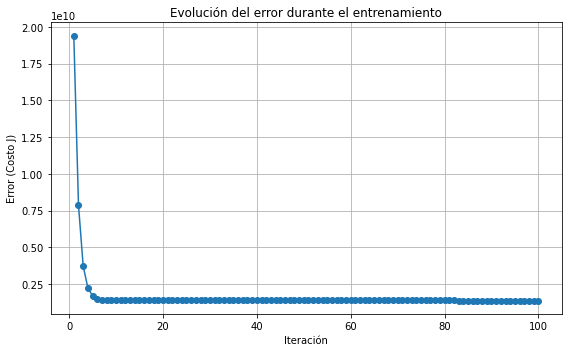

In [62]:
# Suponiendo que ya ejecutaste el entrenamiento:
modelos, errores = entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

# Llamas a la funci√≥n de visualizaci√≥n
graficar_error(errores)

# c. 9 Crear una funci¬¥on que nos permita visualizar con matplotlib c¬¥omo evoluciona el modelo entrenado en el tiempo : Crear una funci¬¥on que tome como par¬¥ametro la estructura de datos conteniendo el historial de modelos ,y un valor ?n? que indica cada cuantas iteraciones graficar el modelo resultante, por ejemplo para n=3 la funci¬¥on debe graficar la recta correspondiente al modelo junto a los datos cada 3 iteraciones, si se ejecutaron 15 iteraciones , para n = 3 se grafica el modelo de las iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.

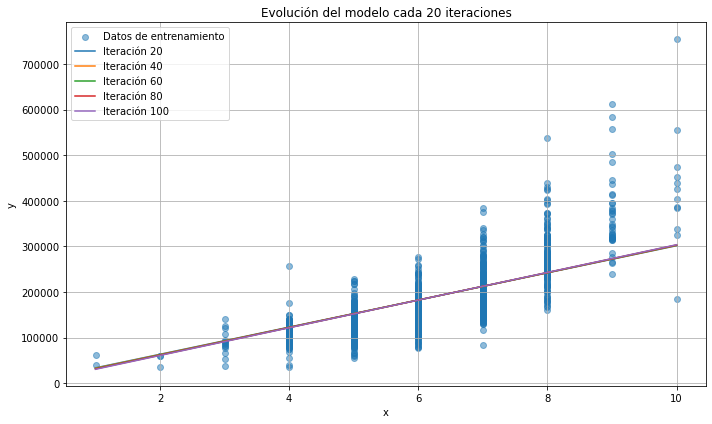

Iteraci√≥n 10: Costo J = 1394454395.5238
Iteraci√≥n 20: Costo J = 1390347591.7550
Iteraci√≥n 30: Costo J = 1388052701.2844
Iteraci√≥n 40: Costo J = 1385779508.0247
Iteraci√≥n 50: Costo J = 1383527744.1567
Iteraci√≥n 60: Costo J = 1381297207.6634
Iteraci√≥n 70: Costo J = 1379087698.4343
Iteraci√≥n 80: Costo J = 1376899018.2454
Iteraci√≥n 90: Costo J = 1374730970.7414
Iteraci√≥n 100: Costo J = 1372583361.4181


In [63]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_evolucion_modelo(modelos, x, y, n):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5, label='Datos de entrenamiento')

    # Crear rango de x para las rectas
    x_line = np.linspace(min(x), max(x), 100)

    for iteracion in sorted(modelos.keys()):
        if iteracion % n == 0:
            beta = modelos[iteracion]  # beta = [beta1, beta0]
            y_line = beta[0] * x_line + beta[1]
            plt.plot(x_line, y_line, label=f'Iteraci√≥n {iteracion}')

    plt.title(f'Evoluci√≥n del modelo cada {n} iteraciones')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    modelos, errores = entrenar_modelo_con_historial(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)

# Graficar c√≥mo evoluciona la regresi√≥n cada 20 iteraciones
graficar_evolucion_modelo(modelos, x, y, n=20)

# c. 10 Utilizar las funciones del punto anterior para entrenar modelos de regresi¬¥on lineal y = Œ≤0+Œ≤1 ‚àóx , para cada una de las variables x elegidas, bas¬¥andose en las funciones para graficar las curvas de aprendizaje y comparaci¬¥on del modelo vs los datos elegir el nu¬¥mero de ?epochs? o iteraciones a entrenar el modelo(y experimentar con el Œ±)



--- Entrenando modelo con: OverallQual ---
Iteraci√≥n 10: Costo J = 0.4944
Iteraci√≥n 20: Costo J = 0.4882
Iteraci√≥n 30: Costo J = 0.4822
Iteraci√≥n 40: Costo J = 0.4763
Iteraci√≥n 50: Costo J = 0.4706
Iteraci√≥n 60: Costo J = 0.4649
Iteraci√≥n 70: Costo J = 0.4594
Iteraci√≥n 80: Costo J = 0.4539
Iteraci√≥n 90: Costo J = 0.4486
Iteraci√≥n 100: Costo J = 0.4434


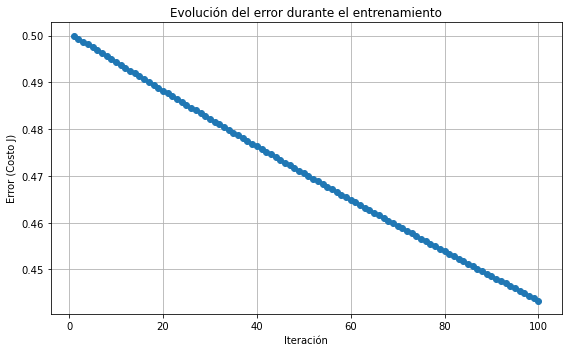

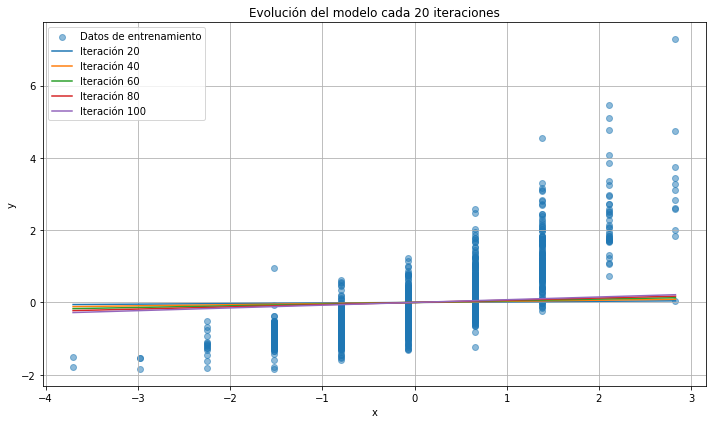

Iteraci√≥n 10: Costo J = 0.4478
Iteraci√≥n 20: Costo J = 0.3999
Iteraci√≥n 30: Costo J = 0.3608
Iteraci√≥n 40: Costo J = 0.3287
Iteraci√≥n 50: Costo J = 0.3025
Iteraci√≥n 60: Costo J = 0.2811
Iteraci√≥n 70: Costo J = 0.2635
Iteraci√≥n 80: Costo J = 0.2492
Iteraci√≥n 90: Costo J = 0.2375
Iteraci√≥n 100: Costo J = 0.2279

--- Entrenando modelo con: 1stFlrSF ---
Iteraci√≥n 10: Costo J = 0.4966
Iteraci√≥n 20: Costo J = 0.4929
Iteraci√≥n 30: Costo J = 0.4893
Iteraci√≥n 40: Costo J = 0.4857
Iteraci√≥n 50: Costo J = 0.4823
Iteraci√≥n 60: Costo J = 0.4789
Iteraci√≥n 70: Costo J = 0.4755
Iteraci√≥n 80: Costo J = 0.4722
Iteraci√≥n 90: Costo J = 0.4690
Iteraci√≥n 100: Costo J = 0.4659


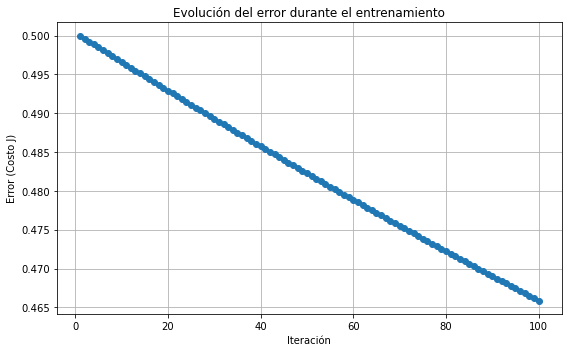

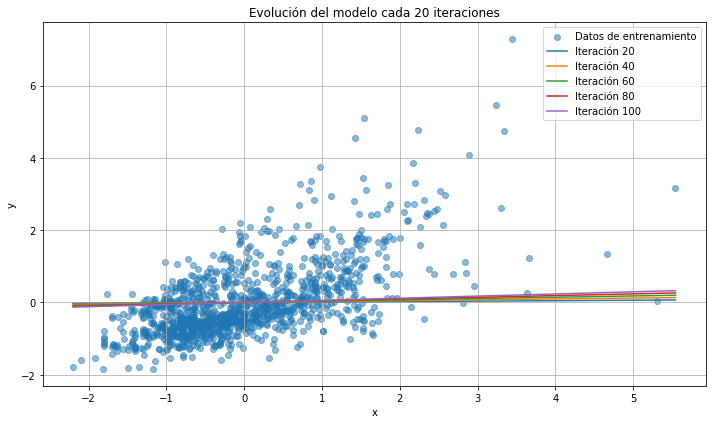

Iteraci√≥n 10: Costo J = 0.4686
Iteraci√≥n 20: Costo J = 0.4397
Iteraci√≥n 30: Costo J = 0.4161
Iteraci√≥n 40: Costo J = 0.3968
Iteraci√≥n 50: Costo J = 0.3810
Iteraci√≥n 60: Costo J = 0.3681
Iteraci√≥n 70: Costo J = 0.3575
Iteraci√≥n 80: Costo J = 0.3489
Iteraci√≥n 90: Costo J = 0.3418
Iteraci√≥n 100: Costo J = 0.3361

--- Entrenando modelo con: TotRmsAbvGrd ---
Iteraci√≥n 10: Costo J = 0.4972
Iteraci√≥n 20: Costo J = 0.4941
Iteraci√≥n 30: Costo J = 0.4910
Iteraci√≥n 40: Costo J = 0.4880
Iteraci√≥n 50: Costo J = 0.4851
Iteraci√≥n 60: Costo J = 0.4822
Iteraci√≥n 70: Costo J = 0.4794
Iteraci√≥n 80: Costo J = 0.4767
Iteraci√≥n 90: Costo J = 0.4740
Iteraci√≥n 100: Costo J = 0.4713


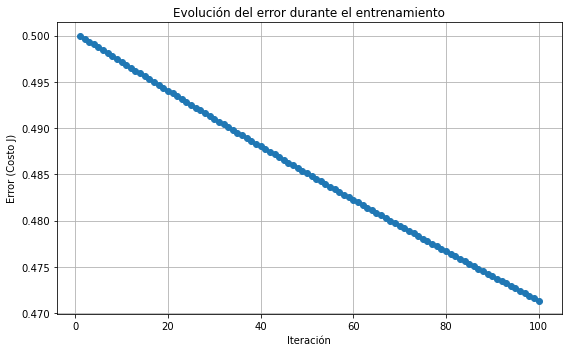

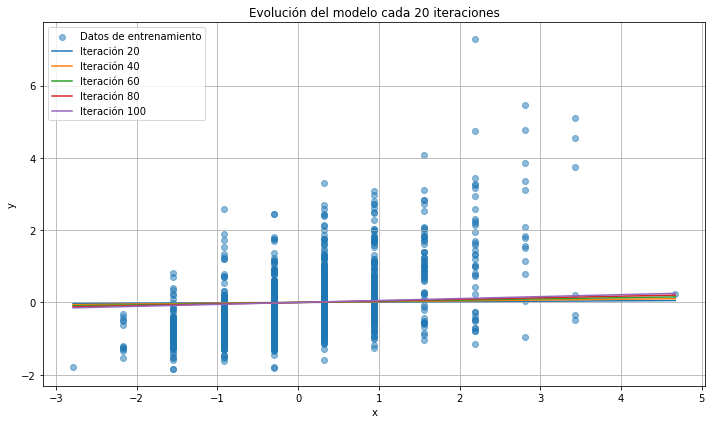

Iteraci√≥n 10: Costo J = 0.4736
Iteraci√≥n 20: Costo J = 0.4494
Iteraci√≥n 30: Costo J = 0.4296
Iteraci√≥n 40: Costo J = 0.4134
Iteraci√≥n 50: Costo J = 0.4001
Iteraci√≥n 60: Costo J = 0.3893
Iteraci√≥n 70: Costo J = 0.3804
Iteraci√≥n 80: Costo J = 0.3731
Iteraci√≥n 90: Costo J = 0.3672
Iteraci√≥n 100: Costo J = 0.3623

--- Entrenando modelo con: YearBuilt ---
Iteraci√≥n 10: Costo J = 0.4975
Iteraci√≥n 20: Costo J = 0.4947
Iteraci√≥n 30: Costo J = 0.4920
Iteraci√≥n 40: Costo J = 0.4893
Iteraci√≥n 50: Costo J = 0.4867
Iteraci√≥n 60: Costo J = 0.4841
Iteraci√≥n 70: Costo J = 0.4816
Iteraci√≥n 80: Costo J = 0.4791
Iteraci√≥n 90: Costo J = 0.4767
Iteraci√≥n 100: Costo J = 0.4744


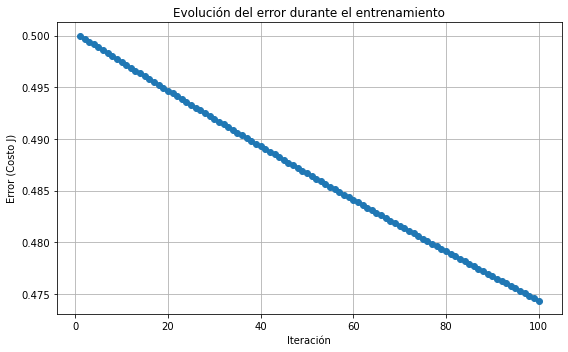

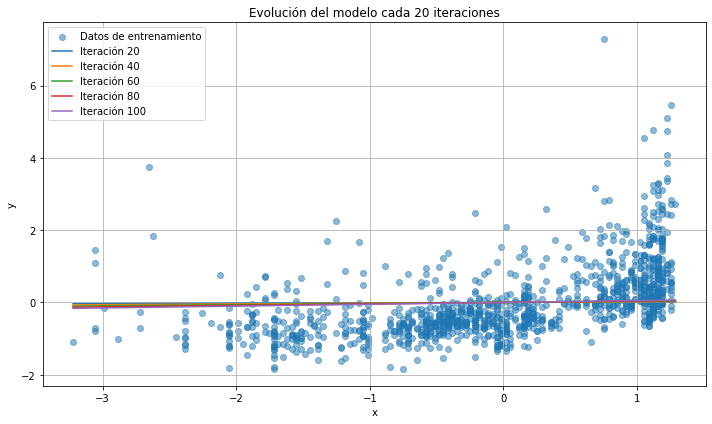

Iteraci√≥n 10: Costo J = 0.4764
Iteraci√≥n 20: Costo J = 0.4547
Iteraci√≥n 30: Costo J = 0.4370
Iteraci√≥n 40: Costo J = 0.4225
Iteraci√≥n 50: Costo J = 0.4106
Iteraci√≥n 60: Costo J = 0.4009
Iteraci√≥n 70: Costo J = 0.3930
Iteraci√≥n 80: Costo J = 0.3865
Iteraci√≥n 90: Costo J = 0.3812
Iteraci√≥n 100: Costo J = 0.3768

--- Entrenando modelo con: LotFrontage ---
Iteraci√≥n 10: Costo J = 0.4988
Iteraci√≥n 20: Costo J = 0.4975
Iteraci√≥n 30: Costo J = 0.4963
Iteraci√≥n 40: Costo J = 0.4950
Iteraci√≥n 50: Costo J = 0.4938
Iteraci√≥n 60: Costo J = 0.4927
Iteraci√≥n 70: Costo J = 0.4915
Iteraci√≥n 80: Costo J = 0.4904
Iteraci√≥n 90: Costo J = 0.4892
Iteraci√≥n 100: Costo J = 0.4881


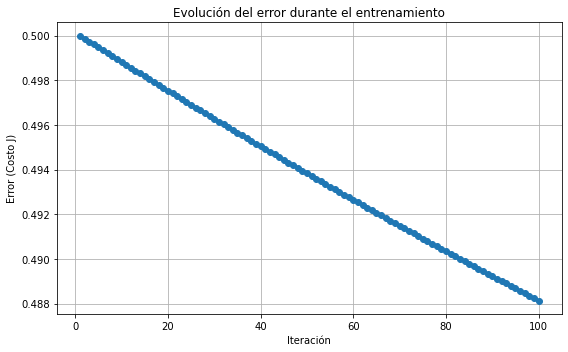

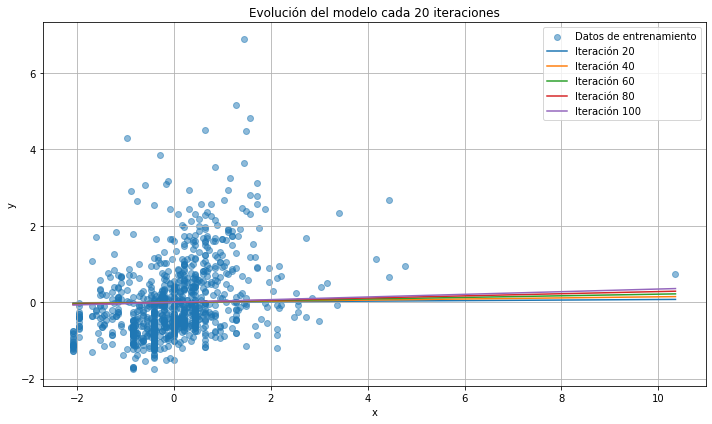

Iteraci√≥n 10: Costo J = 0.4891
Iteraci√≥n 20: Costo J = 0.4791
Iteraci√≥n 30: Costo J = 0.4708
Iteraci√≥n 40: Costo J = 0.4641
Iteraci√≥n 50: Costo J = 0.4587
Iteraci√≥n 60: Costo J = 0.4542
Iteraci√≥n 70: Costo J = 0.4505
Iteraci√≥n 80: Costo J = 0.4475
Iteraci√≥n 90: Costo J = 0.4450
Iteraci√≥n 100: Costo J = 0.4430


In [64]:
# Par√°metros iniciales para experimentar
epochs = 100
alpha = 0.001
graficar_cada = 20  # cada cu√°ntas iteraciones se quiere graficar la recta

for x_var in x_vars:
    print(f"\n--- Entrenando modelo con: {x_var} ---")

    # Obtener x e y crudos
    x_raw = df_train[x_var].values
    y_raw = df_train[y_var].values

    # ‚úÖ Filtrar filas que NO tengan NaN en x ni en y
    valid_idx = ~np.isnan(x_raw) & ~np.isnan(y_raw)
    x_raw = x_raw[valid_idx]
    y_raw = y_raw[valid_idx]

    # ‚úÖ Normalizar
    x = (x_raw - x_raw.mean()) / x_raw.std()
    y = (y_raw - y_raw.mean()) / y_raw.std()

    # Entrenar y obtener historial
    modelos, errores = entrenar_modelo_con_historial(x, y, epochs=epochs, imprimir_error_cada=10, alpha=alpha)

    # Graficar curva de error
    graficar_error(errores)

    # Graficar evoluci√≥n del modelo
    graficar_evolucion_modelo(modelos, x, y, n=graficar_cada)

# c.11 Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresi¬¥on lineal: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


--- Modelo con variable: OverallQual (scikit-learn) ---
Modelo: y = -96469.57 + 45412.00 * OverallQual
MSE: 2293832438.92
R¬≤: 0.6304


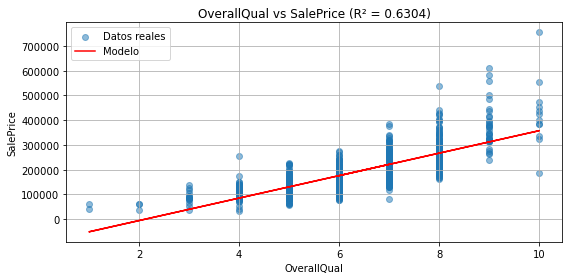


--- Modelo con variable: 1stFlrSF (scikit-learn) ---
Modelo: y = 30324.59 + 129.95 * 1stFlrSF
MSE: 3849257723.92
R¬≤: 0.3798


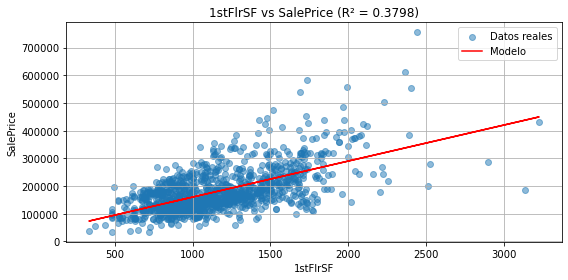

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Variables independientes seleccionadas (aj√∫stalas si usaste otras)
x_vars = ["OverallQual", "1stFlrSF"]
y_var = "SalePrice"

for x_var in x_vars:
    print(f"\n--- Modelo con variable: {x_var} (scikit-learn) ---")

    # Obtener x e y crudos
    x_raw = df_train[x_var].values
    y_raw = df_train[y_var].values

    # ‚úÖ Filtrar filas sin NaN
    valid_idx = ~np.isnan(x_raw) & ~np.isnan(y_raw)
    x = x_raw[valid_idx].reshape(-1, 1)  # scikit-learn necesita 2D
    y = y_raw[valid_idx]

    # Crear y entrenar modelo
    model = LinearRegression()
    model.fit(x, y)

    # Obtener coeficientes
    b0 = model.intercept_
    b1 = model.coef_[0]
    print(f"Modelo: y = {b0:.2f} + {b1:.2f} * {x_var}")

    # Predicci√≥n
    y_pred = model.predict(x)

    # M√©tricas
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"MSE: {mse:.2f}")
    print(f"R¬≤: {r2:.4f}")

    # Visualizaci√≥n
    plt.figure(figsize=(8, 4))
    plt.scatter(x, y, alpha=0.5, label="Datos reales")
    plt.plot(x, y_pred, color='red', label="Modelo")
    plt.title(f"{x_var} vs {y_var} (R¬≤ = {r2:.4f})")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# c.12 Para cada variable independiente x elegida, crear una funci¬¥on que usando el modelo entrenado manualmente y el modelo de scikit-learn(enviados como par¬¥ametros a la funci¬¥on) calcule la estimaci¬¥on o predicci¬¥on de cada uno de estos y devuelva como resultado una predicci¬¥on estimada promediando las predicciones de los 2 modelos

In [66]:
import numpy as np

def predecir_combinado(x_input, beta_manual, modelo_sklearn):
    """
    x_input: vector 1D de valores de x (puede ser cualquier tama√±o)
    beta_manual: tupla (b0, b1) del modelo manual
    modelo_sklearn: modelo entrenado de sklearn
    
    Devuelve: pred_manual, pred_sklearn, pred_promedio
    """
    # Asegurar que x_input es un array
    x_input = np.array(x_input)

    # 1. Predicci√≥n con el modelo manual: yÃÇ = Œ≤1 * x + Œ≤0
    b0, b1 = beta_manual
    pred_manual = b1 * x_input + b0

    # 2. Predicci√≥n con el modelo de scikit-learn
    x_input_reshaped = x_input.reshape(-1, 1)  # sklearn espera 2D
    pred_sklearn = modelo_sklearn.predict(x_input_reshaped)

    # 3. Promedio de ambas predicciones
    pred_promedio = (pred_manual + pred_sklearn) / 2

    return pred_manual, pred_sklearn, pred_promedio

x = df_train["OverallQual"].dropna().values
y = df_train["SalePrice"].dropna().values

# Paso 2: Normaliza si ya lo hiciste antes (opcional)
# x = (x - x.mean()) / x.std()
# y = (y - y.mean()) / y.std()

# Paso 3: Entrenar modelo manual
b0, b1, _ = entrenar_modelo_lineal_vectorizado(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)
beta_manual = (b0, b1)

# Paso 4: Entrenar modelo sklearn
from sklearn.linear_model import LinearRegression

X_reshape = x.reshape(-1, 1)
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_reshape, y)

# Paso 5: Hacer predicciones
x_test = np.array([4, 5, 6, 7, 8])  # valores de ejemplo

pred_manual, pred_sklearn, pred_combinado = predecir_combinado(x_test, beta_manual, modelo_sklearn)

# Paso 6: Mostrar resultados
print("Manual:", pred_manual)
print("Scikit-learn:", pred_sklearn)
print("Promedio:", pred_combinado)

Iteraci√≥n 10: Costo J = 1394454395.5238
Iteraci√≥n 20: Costo J = 1390347591.7550
Iteraci√≥n 30: Costo J = 1388052701.2844
Iteraci√≥n 40: Costo J = 1385779508.0247
Iteraci√≥n 50: Costo J = 1383527744.1567
Iteraci√≥n 60: Costo J = 1381297207.6634
Iteraci√≥n 70: Costo J = 1379087698.4343
Iteraci√≥n 80: Costo J = 1376899018.2454
Iteraci√≥n 90: Costo J = 1374730970.7414
Iteraci√≥n 100: Costo J = 1372583361.4181
Manual: [121375.73144797 151732.19081377 182088.65017957 212445.10954537
 242801.56891118]
Scikit-learn: [ 85178.4237979  130590.42257706 176002.42135622 221414.42013537
 266826.41891453]
Promedio: [103277.07762293 141161.30669541 179045.53576789 216929.76484037
 254813.99391285]


# c.13 Usando el 20 % de los datos de validaci√≥n, aplicamos los modelos predictivos para estimar la variable dependiente y usando los valores reales de y calculamos el error de cada modelo. Para cada variable independiente x elegida: ‚ó¶ Graficar el error de cada modelo para esta variable ?x?. ‚ó¶ Concluir cu√°l modelo para la variable x es el mejor a ser usado (error mas bajo)


üîé Validando modelos para variable: OverallQual
Iteraci√≥n 10: Costo J = 0.4944
Iteraci√≥n 20: Costo J = 0.4882
Iteraci√≥n 30: Costo J = 0.4822
Iteraci√≥n 40: Costo J = 0.4763
Iteraci√≥n 50: Costo J = 0.4706
Iteraci√≥n 60: Costo J = 0.4649
Iteraci√≥n 70: Costo J = 0.4594
Iteraci√≥n 80: Costo J = 0.4539
Iteraci√≥n 90: Costo J = 0.4486
Iteraci√≥n 100: Costo J = 0.4434


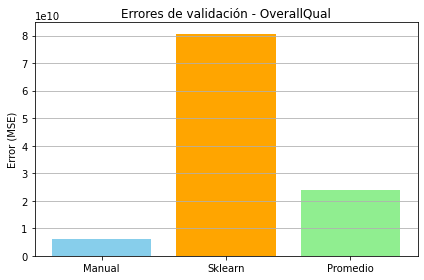

‚úÖ Mejor modelo para OverallQual: Manual (MSE = 5970323274.86)

üîé Validando modelos para variable: 1stFlrSF
Iteraci√≥n 10: Costo J = 0.4966
Iteraci√≥n 20: Costo J = 0.4929
Iteraci√≥n 30: Costo J = 0.4893
Iteraci√≥n 40: Costo J = 0.4857
Iteraci√≥n 50: Costo J = 0.4823
Iteraci√≥n 60: Costo J = 0.4789
Iteraci√≥n 70: Costo J = 0.4755
Iteraci√≥n 80: Costo J = 0.4722
Iteraci√≥n 90: Costo J = 0.4690
Iteraci√≥n 100: Costo J = 0.4659


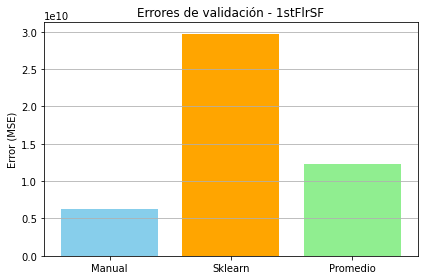

‚úÖ Mejor modelo para 1stFlrSF: Manual (MSE = 6231705500.67)


In [67]:
for x_var in x_vars:
    print(f"\nüîé Validando modelos para variable: {x_var}")

    # --- Entrenamiento ---
    x_train = df_train[x_var].values
    y_train = df_train[y_var].values

    # Quitar NaNs
    valid_idx = ~np.isnan(x_train) & ~np.isnan(y_train)
    x_train = x_train[valid_idx]
    y_train = y_train[valid_idx]

    # Normalizaci√≥n para entrenamiento manual
    x_mean, x_std = x_train.mean(), x_train.std()
    y_mean, y_std = y_train.mean(), y_train.std()
    x_train_norm = (x_train - x_mean) / x_std
    y_train_norm = (y_train - y_mean) / y_std

    # Entrenar modelo manual con normalizados
    b0, b1, _ = entrenar_modelo_lineal_vectorizado(x_train_norm, y_train_norm, epochs=100, alpha=0.001)
    beta_manual = (b0, b1)

    # Entrenar modelo sklearn con originales
    modelo_sklearn = LinearRegression()
    modelo_sklearn.fit(x_train.reshape(-1, 1), y_train)

    # --- Validaci√≥n ---
    x_val = df_val[x_var].values
    y_val = df_val[y_var].values

    valid_idx = ~np.isnan(x_val) & ~np.isnan(y_val)
    x_val = x_val[valid_idx]
    y_val = y_val[valid_idx]

    # Normalizar x_val para usar modelo manual entrenado
    x_val_norm = (x_val - x_mean) / x_std

    # --- Predicciones ---
    pred_manual_norm, pred_sklearn, _ = predecir_combinado(x_val_norm, beta_manual, modelo_sklearn)

    # Desnormalizar la predicci√≥n manual
    pred_manual = pred_manual_norm * y_std + y_mean

    # Modelo combinado
    pred_combinado = (pred_manual + pred_sklearn) / 2

    # --- Validaci√≥n segura ---
    if not np.all(np.isfinite(pred_manual)):
        print(f"‚ö†Ô∏è Modelo manual para {x_var} contiene valores no v√°lidos.")
        continue

    # --- C√°lculo de errores ---
    mse_manual = mean_squared_error(y_val, pred_manual)
    mse_sklearn = mean_squared_error(y_val, pred_sklearn)
    mse_comb = mean_squared_error(y_val, pred_combinado)

    # Gr√°fico de errores
    plt.figure(figsize=(6, 4))
    plt.bar(["Manual", "Sklearn", "Promedio"], [mse_manual, mse_sklearn, mse_comb],
            color=["skyblue", "orange", "lightgreen"])
    plt.ylabel("Error (MSE)")
    plt.title(f"Errores de validaci√≥n - {x_var}")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    # Mostrar conclusi√≥n
    mejores_modelos = {"Manual": mse_manual, "Sklearn": mse_sklearn, "Promedio": mse_comb}
    mejor = min(mejores_modelos, key=mejores_modelos.get)
    print(f"‚úÖ Mejor modelo para {x_var}: {mejor} (MSE = {mejores_modelos[mejor]:.2f})")
